In [1]:
library(tidyverse)
library(fpp3) 
library(rio)
library(ggrepel)
k <- 1.5
options(repr.plot.width=6*k, repr.plot.height=5*k)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ lubridate   1.9.0     ✔ feasts      0.3.0
✔ tsibble     1.1.3     ✔ fable       0.3.2
✔ tsibbledata 0.4.1     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ purrr::flatten()     masks jsonlite::flatten()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble

### STL

In [2]:
m <- import('marriages.csv')

In [3]:
head(m)

,code,name,total,date
,<int64>,<chr>,<int>,<IDate>
1,30,Центральный федеральный округ,14845,2006-01-01
2,30,Центральный федеральный округ,16414,2006-02-01
3,30,Центральный федеральный округ,15753,2006-03-01
4,30,Центральный федеральный округ,21803,2006-04-01
5,30,Центральный федеральный округ,9384,2006-05-01
6,30,Центральный федеральный округ,29571,2006-06-01


In [4]:
dim(m)

[1] 20601     4

In [5]:
m2 <- mutate(m, date=yearmonth(date))

In [6]:
head(m2)

,code,name,total,date
,<int64>,<chr>,<int>,<mth>
1,30,Центральный федеральный округ,14845,2006 Jan
2,30,Центральный федеральный округ,16414,2006 Feb
3,30,Центральный федеральный округ,15753,2006 Mar
4,30,Центральный федеральный округ,21803,2006 Apr
5,30,Центральный федеральный округ,9384,2006 May
6,30,Центральный федеральный округ,29571,2006 Jun


In [7]:
marriages <- as_tsibble(m2, index = date,
                       key = c('code', 'name'))

In [8]:
head(marriages)

code,name,total,date
<int64>,<chr>,<int>,<mth>
30,Центральный федеральный округ,14845,2006 Jan
30,Центральный федеральный округ,16414,2006 Feb
30,Центральный федеральный округ,15753,2006 Mar
30,Центральный федеральный округ,21803,2006 Apr
30,Центральный федеральный округ,9384,2006 May
30,Центральный федеральный округ,29571,2006 Jun


In [10]:
m_rf <- filter(marriages, code == 643)

In [11]:
glimpse(m_rf)

Rows: 189
Columns: 4
Key: code, name [1]
$ code  <int64> 643, 643, 643, 643, 643, 643, 643, 643, 643, 643, 643, 643, 64…
$ name  <chr> "Российская Федерация", "Российская Федерация", "Российская Феде…
$ total <int> 55509, 62449, 70798, 86055, 35960, 111409, 127475, 149120, 15111…
$ date  <mth> 2006 Jan, 2006 Feb, 2006 Mar, 2006 Apr, 2006 May, 2006 Jun, 2006…


In [12]:
stl_model <- model(m_rf, decomp=STL(total~trend(window=100)+season(window=5)))

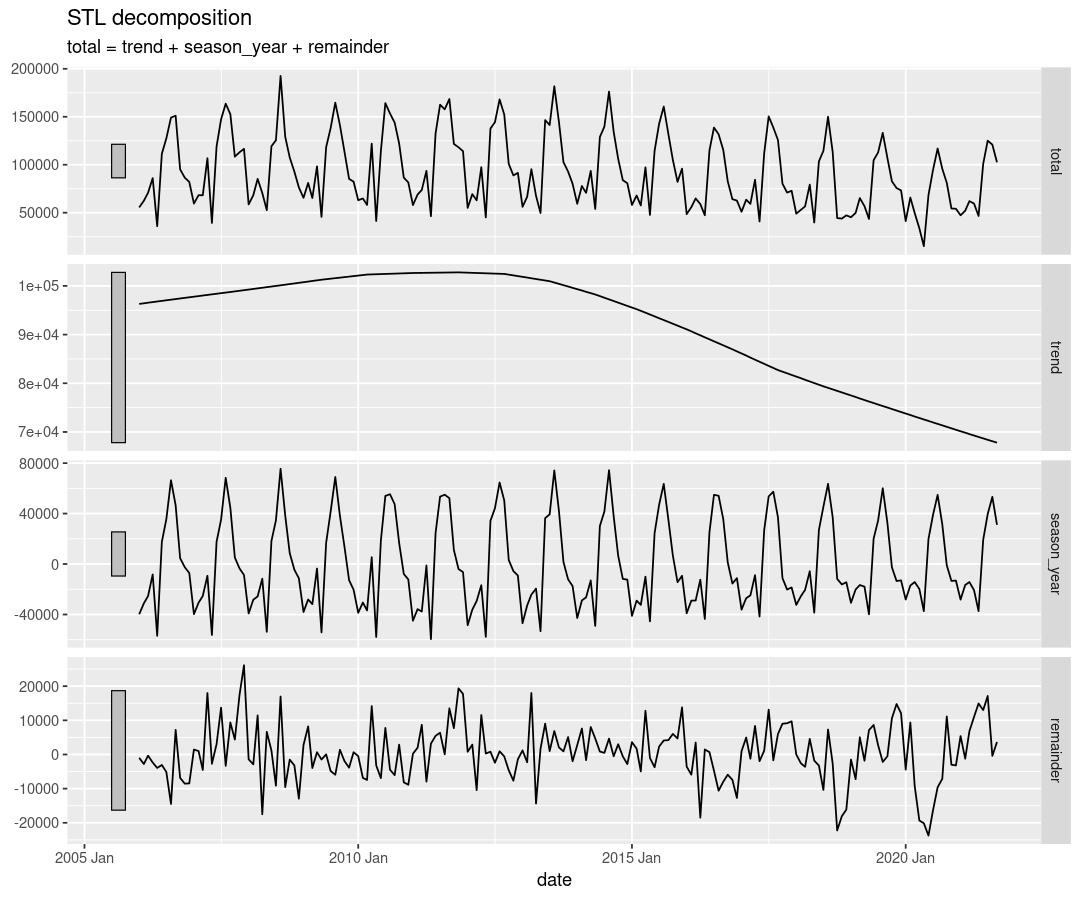

In [14]:
components(stl_model) %>% autoplot()

### Features

In [15]:
marriages

code,name,total,date
<int64>,<chr>,<int>,<mth>
30,Центральный федеральный округ,14845,2006 Jan
30,Центральный федеральный округ,16414,2006 Feb
30,Центральный федеральный округ,15753,2006 Mar
30,Центральный федеральный округ,21803,2006 Apr
30,Центральный федеральный округ,9384,2006 May
30,Центральный федеральный округ,29571,2006 Jun
30,Центральный федеральный округ,35691,2006 Jul
30,Центральный федеральный округ,39263,2006 Aug
30,Центральный федеральный округ,40480,2006 Sep


In [16]:
marr_features <- features(marriages, total, feat_stl)
head(marr_features)

Warning message:
“1 error encountered for feature 1
[1] series is not periodic or has less than two periods
”


code,name,trend_strength,seasonal_strength_year,seasonal_peak_year,seasonal_trough_year,spikiness,linearity,curvature,stl_e_acf1,stl_e_acf10
<int64>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30,Центральный федеральный округ,0.4810037,0.9110944,8,5,7721161951,-27906.941,-19435.382,-0.21384942,0.2570284
31,Северо-Западный федеральный округ,0.6669555,0.9441610,8,5,55017950,-10549.927,-10234.757,0.13154397,0.2430020
32,Южный федеральный округ (по 2009 год),0.2735227,0.9143495,9,5,5464044502,1537.425,-4222.783,-0.36455231,0.6694620
33,Приволжский федеральный округ,0.6689735,0.9275215,8,5,1915863897,-34542.489,-19551.432,-0.26230994,0.2539295
34,Уральский федеральный округ,0.6865234,0.9231340,8,5,48939357,-13784.223,-8061.513,-0.09121243,0.2528265
35,Сибирский федеральный округ,0.8879235,0.9279884,8,5,715812433,-31242.894,-28907.277,0.02200782,0.1923886


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 77 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


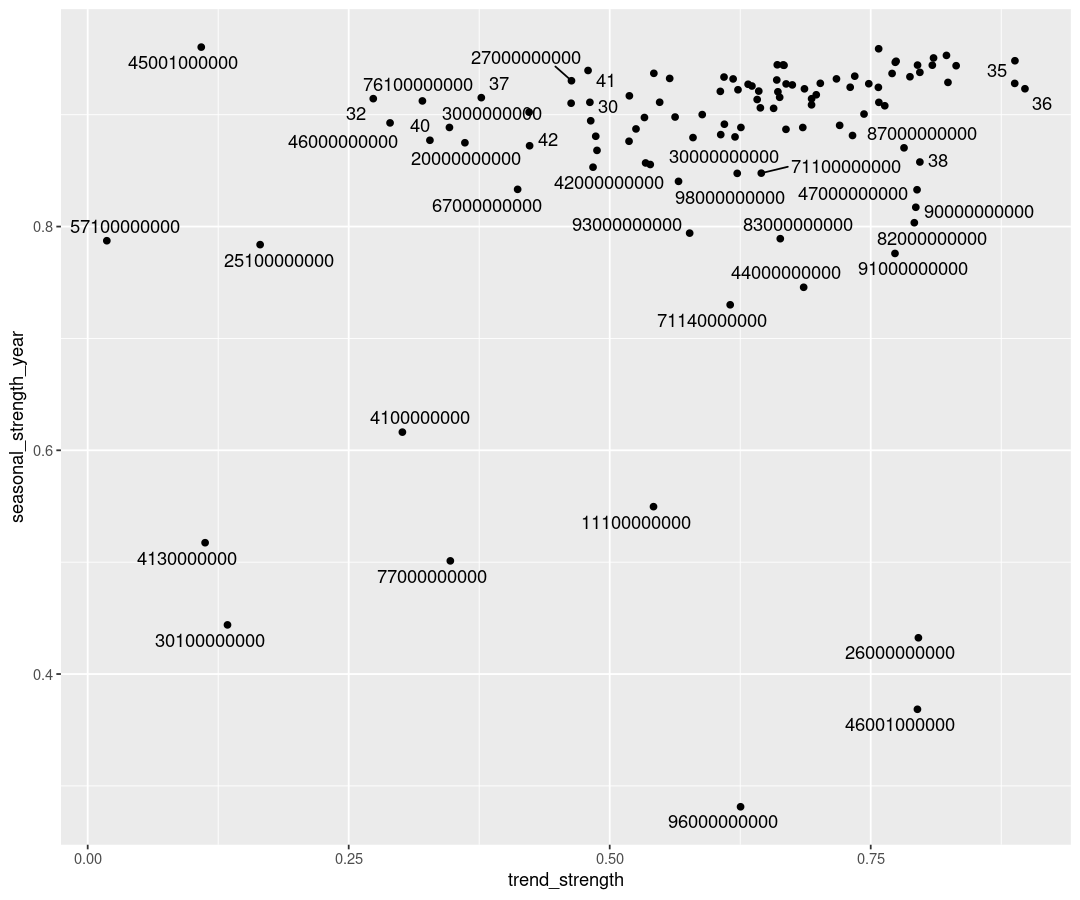

In [17]:
ggplot(marr_features, aes(x = trend_strength,
              y = seasonal_strength_year,
              label = as.character(code))) +
              geom_point() + geom_text_repel()